# Structured Data
## Exploratory Data Analysis

In this notebook I am comparing various models that can be used to predict a bird species based on tabular data such as:

- mean spectral centroid (brightness of a sound)
- mean spectral bandwidth (range)
- mean spectral contrast (the difference in amplitude (dB) between peaks and valleys of spectral energy)
- mean spectral flatness ("a way to quantify how much a sound resembles a pure tone, as opposed to being noise-like.")

Generally, in this notebook we'll be dealing with single numbers that describe the characteristics of each bird.

In [23]:
import pandas as pd
import numpy as np
from helpers import features, util, noise_reduction

In [24]:
df = pd.read_csv("./data/bird_recordings.csv")
df.head(20)

,id,genus,subspecies,name,country,quality,latitude,longitude
0,900826,Fringilla,coelebs,Common Chaffinch,Spain,A,39.8279,-6.0577
1,818441,Fringilla,coelebs,Common Chaffinch,Belgium,A,50.3759,3.8801
2,806671,Fringilla,coelebs,Common Chaffinch,Italy,A,42.7929,11.9141
3,793412,Fringilla,coelebs,Common Chaffinch,Poland,A,53.8362,22.9651
4,793409,Fringilla,coelebs,Common Chaffinch,Poland,A,53.8362,22.9651
5,792675,Fringilla,coelebs,Common Chaffinch,France,A,42.8865,2.0822
6,730707,Fringilla,coelebs,Common Chaffinch,Sweden,A,56.2140,16.4137
7,721070,Fringilla,coelebs,Common Chaffinch,Poland,A,51.1303,15.9591
8,720846,Fringilla,coelebs,Common Chaffinch,Norway,A,60.5754,4.9510
9,719878,Fringilla,coelebs,Common Chaffinch,Spain,A,41.5286,2.3477


In [25]:
mean_spectral_centroids = []
spectral_centroid_variances = []

mean_spectral_bandwidths = []
spectral_bandwidth_variances = []

mean_spectral_contrasts = []
spectral_contrast_variances = []

mean_spectral_flatnesses = []
spectral_flatness_variances = []

mean_zcrs = []
zcr_variances = []

mean_rms = []
rms_variances = []


for index, row in df.iterrows():
    y, sr = util.load_audio(row['id'])
    
    y = noise_reduction.apply_spectral_gate(y, sr)
    y = util.normalize_audio(y)
    
    spectral_centroids = features.get_spectral_centroids(y, sr)
    mean_spectral_centroids.append(spectral_centroids['mean'])
    spectral_centroid_variances.append(spectral_centroids['variance'])
    
    spectral_bandwidths = features.get_spectral_bandwidths(y, sr)
    mean_spectral_bandwidths.append(spectral_bandwidths['mean'])
    spectral_bandwidth_variances.append(spectral_bandwidths['variance'])
    
    spectral_flatnesses = features.get_spectral_flatnesses(y, sr)
    mean_spectral_flatnesses.append(spectral_flatnesses['mean'])
    spectral_flatness_variances.append(spectral_flatnesses['variance'])
    
    spectral_contrasts = features.get_spectral_constrasts(y, sr)
    mean_spectral_contrasts.append(spectral_contrasts['mean'])
    spectral_contrast_variances.append(spectral_contrasts['variance'])
    
    zcrs = features.get_zero_crossing_rates(y)
    mean_zcrs.append(zcrs['mean'])
    zcr_variances.append(zcrs['variance'])
    
    rms = features.get_rms(y)
    mean_rms.append(rms['mean'])
    rms_variances.append(rms['variance'])
    
    
df['mean_spectral_centroid'] = mean_spectral_centroids
df['spectral_centroid_variance'] = spectral_centroid_variances

df['mean_spectral_bandwidth'] = mean_spectral_bandwidths
df['spectral_bandwidth_variance'] = spectral_bandwidth_variances

df['mean_spectral_contrast'] = mean_spectral_contrasts
df['spectral_constrast_variance'] = spectral_contrast_variances

df['mean_spectral_flatness'] = mean_spectral_flatnesses
df['spectral_flatness_variance'] = spectral_flatness_variances

df['mean_zcr'] = mean_zcrs
df['zcr_variance'] = zcr_variances

df['mean_rms'] = mean_rms
df['rms_variance'] = rms_variances

df.head(20)

,id,genus,subspecies,name,country,quality,latitude,longitude,mean_spectral_centroid,spectral_centroid_variance,mean_spectral_bandwidth,spectral_bandwidth_variance,mean_spectral_contrast,spectral_constrast_variance,mean_spectral_flatness,spectral_flatness_variance,mean_zcr,zcr_variance,mean_rms,rms_variance
0,900826,Fringilla,coelebs,Common Chaffinch,Spain,A,39.8279,-6.0577,3359.582527,1818.681882,1270.074423,783.255564,30.984131,17.563780,0.012034,0.105874,0.416607,0.220660,0.034920,0.042293
1,818441,Fringilla,coelebs,Common Chaffinch,Belgium,A,50.3759,3.8801,2782.578928,1415.577160,1425.029550,863.347021,33.861310,17.675076,0.045379,0.168609,0.331740,0.176281,0.015952,0.048182
2,806671,Fringilla,coelebs,Common Chaffinch,Italy,A,42.7929,11.9141,3234.720652,2047.811484,814.528981,656.921999,29.919347,17.881258,0.041345,0.169833,0.392448,0.246176,0.021567,0.043408
3,793412,Fringilla,coelebs,Common Chaffinch,Poland,A,53.8362,22.9651,3702.317202,1488.514871,846.201626,572.870358,29.892425,17.025957,0.036418,0.162733,0.448023,0.182593,0.047800,0.082344
4,793409,Fringilla,coelebs,Common Chaffinch,Poland,A,53.8362,22.9651,2756.872906,2102.301331,587.100167,607.527283,25.144591,16.209988,0.230603,0.377422,0.315519,0.234010,0.047324,0.085800
5,792675,Fringilla,coelebs,Common Chaffinch,France,A,42.8865,2.0822,2823.495663,1827.401869,696.641750,631.813596,27.682981,15.488086,0.133332,0.293883,0.333006,0.212585,0.013869,0.041721
6,730707,Fringilla,coelebs,Common Chaffinch,Sweden,A,56.2140,16.4137,1914.259077,1944.995705,407.968911,344.672176,25.285405,15.614094,0.173154,0.338554,0.231622,0.234719,0.032050,0.057372
7,721070,Fringilla,coelebs,Common Chaffinch,Poland,A,51.1303,15.9591,3894.631262,1394.622538,1086.804373,640.010775,32.984427,19.262768,0.055145,0.224099,0.466609,0.205355,0.035832,0.076187
8,720846,Fringilla,coelebs,Common Chaffinch,Norway,A,60.5754,4.9510,1796.303877,1532.412046,975.412364,648.683571,30.308560,16.756906,0.000559,0.001780,0.164203,0.162980,0.049488,0.076815
9,719878,Fringilla,coelebs,Common Chaffinch,Spain,A,41.5286,2.3477,1964.375730,1807.051421,852.902177,751.025186,27.551997,15.956902,0.021715,0.132011,0.242046,0.213559,0.016284,0.034177


In [26]:
mode = 'mean'
df.groupby('name').agg({
    'mean_spectral_centroid': mode,
    'spectral_centroid_variance': mode,
    'mean_spectral_bandwidth': mode,
    'spectral_bandwidth_variance': mode,
    'mean_spectral_contrast': mode,
    'spectral_constrast_variance': mode,
    'mean_spectral_flatness': mode,
    'spectral_flatness_variance': mode,
    'mean_zcr': mode,
    'zcr_variance': mode,
    'mean_rms': mode,
    'rms_variance': mode
}).head(20)

,mean_spectral_centroid,spectral_centroid_variance,mean_spectral_bandwidth,spectral_bandwidth_variance,mean_spectral_contrast,spectral_constrast_variance,mean_spectral_flatness,spectral_flatness_variance,mean_zcr,zcr_variance,mean_rms,rms_variance
name,,,,,,,,,,,,
Common Blackbird,2446.156766,1616.955477,748.089832,570.961591,31.823557,16.843608,0.061694,0.200327,0.285110,0.184902,0.023924,0.048036
Common Chaffinch,2714.421903,1659.233695,1031.167910,665.842481,29.973357,16.960340,0.037415,0.122274,0.320594,0.196605,0.020525,0.037087
Common Cuckoo,2614.614370,1461.049856,1133.566525,633.860296,32.882278,16.174996,0.054492,0.126363,0.308413,0.176879,0.037871,0.061753
Common Wood Pigeon,2352.992568,1448.159771,1196.921551,648.034272,32.080712,15.737078,0.026983,0.093381,0.267299,0.176380,0.026766,0.041495
Eurasian Blackcap,3228.224456,1615.204745,850.592088,611.259253,32.581956,18.241905,0.034133,0.115767,0.384297,0.191128,0.027291,0.043098
Eurasian Blue Tit,3206.104026,1899.352505,830.594026,549.351786,30.851453,16.638506,0.080291,0.128900,0.368261,0.223387,0.030952,0.054961
Eurasian Wren,3705.395591,1849.424144,1100.356178,615.641591,30.491030,18.750690,0.010991,0.045160,0.423562,0.231793,0.056378,0.061625
European Robin,2940.839755,1865.990858,828.863626,577.030360,31.069030,16.952387,0.052481,0.126753,0.351049,0.222589,0.018751,0.039577
Great Tit,3067.188336,1703.830063,1029.429642,643.766970,30.285327,16.949077,0.032018,0.099417,0.362181,0.202894,0.029235,0.047539


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# split data into X and y
X = df[[
    'mean_spectral_centroid',
    'spectral_centroid_variance',
    'mean_spectral_bandwidth',
    'spectral_bandwidth_variance',
    'mean_spectral_contrast',
    'spectral_constrast_variance',
    'mean_spectral_flatness',
    'spectral_flatness_variance',
    'mean_zcr',
    'zcr_variance',
    'mean_rms',
    'rms_variance'
]]
y = df['name']

# split data into train and test sets
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

le = LabelEncoder().fit(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

Top-1 Accuracy: 37.00%
Top-2 Accuracy: 62.00%
Top-3 Accuracy: 72.00%


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

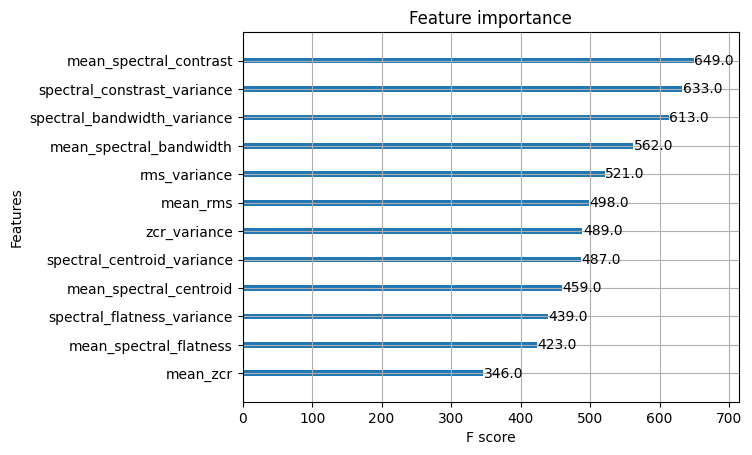

In [28]:
from xgboost import XGBClassifier
from xgboost import plot_importance

model = XGBClassifier(objective='multi:softprob')
model.fit(X_train, y_train)

def get_top_k_accuracy(model, X_test, y_test, k=3):
    # make predictions for test data
    y_pred = model.predict_proba(X_test)
    top_k_correct = 0
    for i in range(len(y_test)):
        # Get indices of top k probabilities
        top_k_preds = np.argsort(y_pred[i])[::-1][:k]
        # Check if the true label is in the top k predictions
        if y_test[i] in top_k_preds:
            top_k_correct += 1
    # Calculate the percentage
    top_k_accuracy = top_k_correct / len(y_test)
    print(f"Top-{k} Accuracy: {top_k_accuracy*100:.2f}%")
    return top_k_accuracy

get_top_k_accuracy(model, X_test, y_test, k=1)
get_top_k_accuracy(model, X_test, y_test, k=2)
get_top_k_accuracy(model, X_test, y_test, k=3)

plot_importance(model)

## Hyper parameter tuning

### Grid search

In [29]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [10, 20, 50],
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='top_k_accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

get_top_k_accuracy(best_model, X_test, y_test, k=3)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Top-3 Accuracy: 71.00%


0.71

### Baysian Optimisation

In [35]:
import optuna
import joblib
from sklearn.metrics import log_loss


# Objective function for Optuna
def objective(trial):
    
    # Define hyperparameters to tune
    param = {
        'objective': 'multi:softprob',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5)
    }
    
    # Train the model
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # Predict probabilities
    probabilities = model.predict_proba(X_test)
    
    # Calculate log loss
    loss = log_loss(y_test, probabilities)
    
    return loss


# Create a study and optimize
study = optuna.create_study(direction='minimize')  # Minimize log loss
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)
print("Number of finished trials:", len(study.trials))
print("Best Log Loss: %.4f" % study.best_value)

# Get the best model
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

get_top_k_accuracy(best_model, X_test, y_test, k=3)

# Save the model
joblib.dump(best_model, "best_model.pkl")

[I 2024-08-26 20:03:40,152] A new study created in memory with name: no-name-48659dc2-da9a-49be-8c6f-6c39be4c8e4e
C:\Users\vchap\AppData\Local\Temp\ipykernel_4924\3315180293.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5)
[I 2024-08-26 20:03:41,404] Trial 0 finished with value: 1.992144020537912 and parameters: {'n_estimators': 240, 'max_depth': 15, 'learning_rate': 0.3131070363531402}. Best is trial 0 with value: 1.992144020537912.
C:\Users\vchap\AppData\Local\Temp\ipykernel_4924\3315180293.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_

Best Parameters: {'n_estimators': 491, 'max_depth': 2, 'learning_rate': 0.01916771235284571}
Number of finished trials: 100
Best Log Loss: 1.7140
Top-3 Accuracy: 68.00%


['best_model.pkl']

In [36]:
# Load the model
model = joblib.load("best_model.pkl")
get_top_k_accuracy(model, X_test, y_test, k=1)
get_top_k_accuracy(model, X_test, y_test, k=3)

Top-1 Accuracy: 40.00%
Top-3 Accuracy: 68.00%


0.68

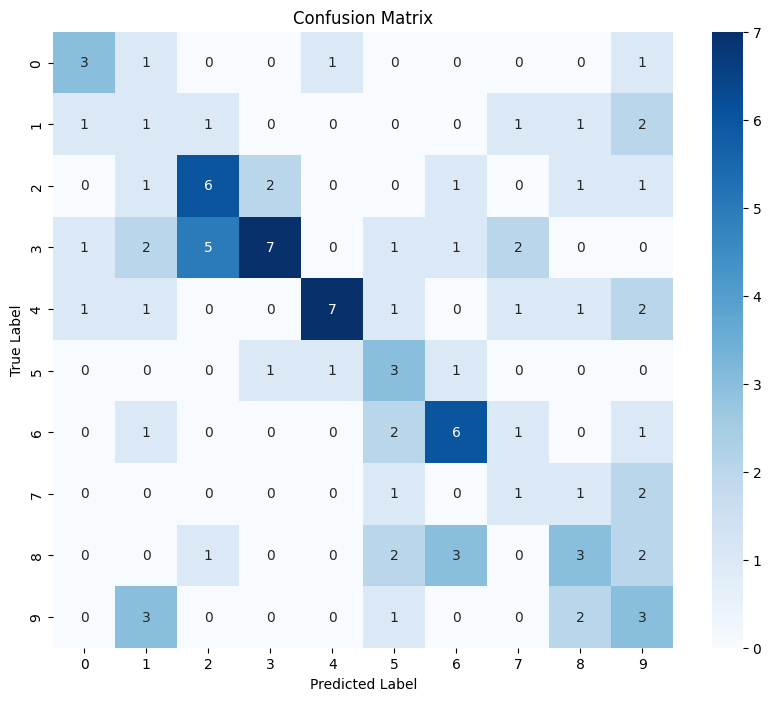

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming final_model is your trained XGBoost model and X_new is your test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.arange(10))  # Adjust labels as per your classes

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.arange(10), yticklabels=np.arange(10))  # Adjust tick labels as per your classes
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [38]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred, labels=np.arange(10)))  # Adjust labels as per your classes

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.10      0.14      0.12         7
           2       0.46      0.50      0.48        12
           3       0.70      0.37      0.48        19
           4       0.78      0.50      0.61        14
           5       0.27      0.50      0.35         6
           6       0.50      0.55      0.52        11
           7       0.17      0.20      0.18         5
           8       0.33      0.27      0.30        11
           9       0.21      0.33      0.26         9

    accuracy                           0.40       100
   macro avg       0.40      0.39      0.38       100
weighted avg       0.47      0.40      0.42       100



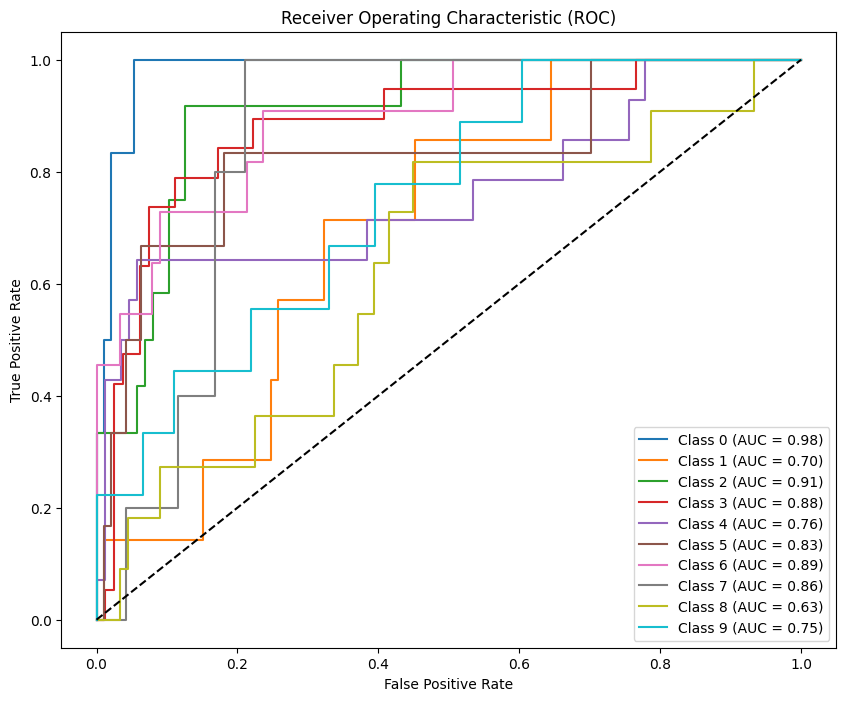

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_bin = label_binarize(y_test, classes=np.arange(10))  # Adjust classes as per your classes
y_pred_prob = best_model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):  # Adjust range as per your classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(10):  # Adjust range as per your classes
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='best')
plt.show()


- All features with no noise reduction gives ~30% accuracy
- Suprisingly adding noise reduction made no difference
- Hyper tuning algorithms are an easy way to gain small improv
- Managed to achieve 46% accuracy by using entire dataset, and training with Bayes Optimizer.
- The model is currently 40% accurate.
- 73% of the time the correct label is in the top 3.